<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-08-22 05:40:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-08-22 05:40:24 (10.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

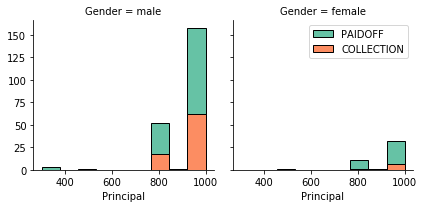

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

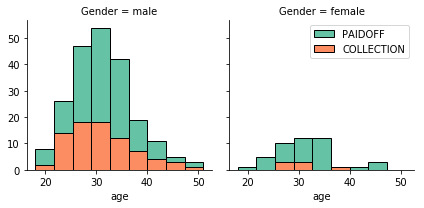

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

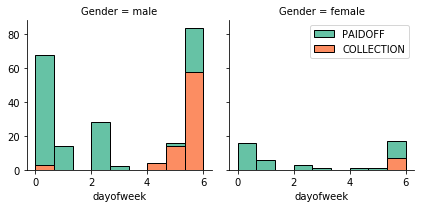

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Lets define feature set y:

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Classification 

Now, I will use the training set to build an accurate model and then use the test set to report the accuracy of the model using the following algorithms:

K Nearest Neighbor(KNN)
Decision Tree
Support Vector Machine
Logistic Regression

# K Nearest Neighbor(KNN)

Splitting the Data into Training and Testing sets where the Training set constitutes 75% of the data set and the Testing set constitutes 25% of the data set.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)
print("Training sets:","\n", "X_train:", X_train.shape,"\n", "y_train:", y_train.shape)
print("Testing sets:","\n", "X_test:", X_test.shape,"\n", "y_test:", y_test.shape)

Training sets: 
 X_train: (259, 8) 
 y_train: (259,)
Testing sets: 
 X_test: (87, 8) 
 y_test: (87,)


# Normalizing the Training and the Testing Data

Data Standardization give data zero mean and unit variance



In [70]:
X_train= preprocessing.StandardScaler().fit(X_train).transform(X_train)
print("Normalizard X_train:","\n",X_train[0:5])
X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test)
print("Normalizard X_test:","\n",X_test[0:5])

Normalizard X_train: 
 [[-5.65628952 -1.97871795 -0.31279182 -0.40178972 -1.17309283 -0.40824829
   1.10166929 -0.81912621]
 [ 0.56254183  0.94397554  0.52585292 -0.40178972  0.85244746 -0.40824829
  -0.90771343  1.2208131 ]
 [-1.21426713 -0.96212891 -0.31279182 -0.40178972  0.85244746 -0.40824829
  -0.90771343  1.2208131 ]
 [-1.21426713  0.94397554  0.02266607 -0.40178972 -1.17309283 -0.40824829
  -0.90771343  1.2208131 ]
 [ 0.56254183  0.94397554  0.52585292 -0.40178972 -1.17309283  2.44948974
  -0.90771343 -0.81912621]]
Normalizard X_test: 
 [[ 0.37169088  0.85650628 -0.18648085 -0.47471266  0.76277007 -0.29580399
   1.24852855 -1.03509834]
 [-1.71457407 -0.95213563 -0.18648085 -0.47471266  0.76277007 -0.29580399
  -0.80094284  0.96609178]
 [ 0.37169088 -0.95213563 -0.02584883 -0.47471266 -1.31101106 -0.29580399
   1.24852855 -1.03509834]
 [ 0.37169088  0.85650628 -1.15027299 -0.47471266 -1.31101106 -0.29580399
  -0.80094284  0.96609178]
 [ 0.37169088  0.85650628  0.45604724 -0.4747

# Finding the Best K¶

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.72413793, 0.71264368, 0.77011494, 0.72413793, 0.75862069,
       0.75862069, 0.7816092 , 0.77011494, 0.77011494])

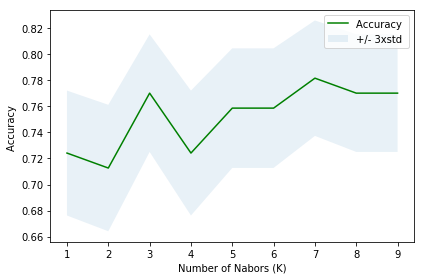

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7816091954022989 with k= 7


We see that the model is predicting the loan status to maximum accuracy when the value of k nearest neighbors is 7, so let us use this value of k to build our model.

In [24]:
k = 7
#Training the Model and Predicting 
K_Neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
K_Neighbors
yhat = K_Neighbors.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [28]:
#CHECKING THE ACCURACY OF THE MODEL:

f1 = f1_score(y_test, yhat, average='weighted')
print("F1 Score for KNN:", round(f1, 2))
Jaccard_Index = jaccard_similarity_score(y_test, yhat)
print("Jaccard Index for KNN:", round(Jaccard_Index, 2))

F1 Score for KNN: 0.76
Jaccard Index for KNN: 0.78


Therefore, the model built using the clustering algorithm K Nearest Neighbors is 76-78% accurate for predicting the loan status. Further, let us use a classification technique called Decision Tree to build our model and check if the accuracy increases or decreases.

# Decision Tree

Decision tree is a classifier algorithm which uses a decision tree to go from observations about an item to conclusions about the item's target value. Since we had already splitted our data into training and testing sets and normalised the same, we will use the same sets for building this model as well. Importing relevant libraries and building the Model called Loan_Status_DT:



In [29]:
from sklearn.tree import DecisionTreeClassifier
Loan_Status_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Loan_Status_DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
Predict_Loan = Loan_Status_DT.predict(X_test)
print ("Loan Status Predicted using Decision Tree:","\n",Predict_Loan[0:5])
print ("Test set Loan Status","\n", y_test[0:5])

#Accuracy of the Model:

f1 = f1_score(y_test, Predict_Loan, average='weighted')
print('\n',"F1 Score for Loan_Status_DT:", round(f1, 2))
Jaccard_Index = jaccard_similarity_score(y_test, Predict_Loan)
print("Jaccard Index for Loan_Status_DT:", round(Jaccard_Index, 2))

Loan Status Predicted using Decision Tree: 
 ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Test set Loan Status 
 ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']

 F1 Score for Loan_Status_DT: 0.74
Jaccard Index for Loan_Status_DT: 0.75


The accuracy for model built using the Decision Tree algorithm came out to be 75% which was more or less same as that with the KNN algorithm. Now let us see build another classifier model using the Support Vector Machine Algorithm.

# Support Vector Machine

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

Modeling:

In [31]:
from sklearn import svm
Loan_SVM = svm.SVC(kernel='rbf')
Loan_SVM.fit(X_train, y_train) 
loansvm = Loan_SVM.predict(X_test)
loansvm[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Calculating Accuracy of the SVM Model:

In [33]:
f1 = f1_score(y_test, loansvm, average='weighted')
print("F1 Score for Loan_Status_DT:", round(f1, 2))
Jaccard_Index = jaccard_similarity_score(y_test, loansvm)
print("Jaccard Index for Loan_Status_DT:", round(Jaccard_Index, 2))

F1 Score for Loan_Status_DT: 0.65
Jaccard Index for Loan_Status_DT: 0.75


The SVM model is 65-75% accurate. Let's build our final model-Logistic Regression to predict the loan status and check the accuracy of our Model.

# Logistic Regression
Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Building the Model:

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

Loan_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
Loan_LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Predicting the Loan Status for the Test Set:

In [36]:
loanlr = Loan_LR.predict(X_test)
loanlr
loan_prob = Loan_LR.predict_proba(X_test)
loan_prob[0:5]

array([[0.48413329, 0.51586671],
       [0.43874338, 0.56125662],
       [0.30960948, 0.69039052],
       [0.33613219, 0.66386781],
       [0.31732537, 0.68267463]])

Checking Accuracy:

In [50]:

f1 = f1_score(y_test, loanlr, average='weighted')
print("F1 Score for Loan_Status_DT:", round(f1, 2))
Jaccard_Index = jaccard_similarity_score(y_test, loanlr)
print("Jaccard Index for Loan_Status_DT:", round(Jaccard_Index, 2))
ll = log_loss(y_test, loan_prob)
print("Log Loss of the Logistic Regression Model:", round(ll,2))

F1 Score for Loan_Status_DT: 0.61
Jaccard Index for Loan_Status_DT: 0.71
Log Loss of the Logistic Regression Model: 0.57


# Model Evaluation using Test set

In [51]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [52]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-08-22 06:55:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-08-22 06:55:53 (453 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [74]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Pre-Processing the Data:

In [75]:
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Test_Feature = df_test[['Principal','terms','age','Gender','weekend']]
Test_Feature = pd.concat([Test_Feature,pd.get_dummies(df_test['education'])], axis=1)
Test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
Test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [76]:
X = Test_Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
y = df_test['loan_status'].values
y[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# KNN Model Evaluation

In [86]:
yhatKNN=K_Neighbors.predict(X)
KNNf1 = f1_score(y, yhatKNN, average='weighted')
print("F1 Score for KNN on the Test Set:", round(KNNf1, 2))
KNNJaccard_Index = jaccard_similarity_score(y, yhatKNN)
print("Jaccard Index for KNN on the Test Set:", round(KNNJaccard_Index, 2))

F1 Score for KNN on the Test Set: 0.63
Jaccard Index for KNN on the Test Set: 0.69


# Decision Tree Model Evaluation

In [87]:
yhatDEC = Loan_Status_DT.predict(X)
DTf1 = f1_score(y, yhatDEC, average='weighted')
print("F1 Score for Decision Tree on the Test Set:", round(DTf1, 2))
DTJaccard_Index = jaccard_similarity_score(y, yhatDEC)
print("Jaccard Index for Decision Tree on the Test Set:", round(DTJaccard_Index, 2))

F1 Score for Decision Tree on the Test Set: 0.8
Jaccard Index for Decision Tree on the Test Set: 0.8


# Support Vector Machine Evaluation

In [90]:
yhatSVM=Loan_SVM.predict(X)
SVMf1 = f1_score(y, yhatSVM, average='micro')
print("F1 Score for SVM on the Test Set:", round(SVMf1, 2))
SVMJaccard_Index = jaccard_similarity_score(y, yhatSVM)
print("Jaccard Index for SVM on the Test Set:", round(SVMJaccard_Index, 2))

F1 Score for SVM on the Test Set: 0.74
Jaccard Index for SVM on the Test Set: 0.74


# Logisitic Regression Evaluation

In [91]:
yhatLOG = Loan_LR.predict(X)
yhatLOGproba = Loan_LR.predict_proba(X)
LRf1 = f1_score(y, yhatLOG, average='weighted')
print("F1 Score for Logistic Regression on the Test Set:", round(LRf1, 2))
LRJaccard_Index = jaccard_similarity_score(y, yhatLOG)
print("Jaccard Index for Logistic Regression on the Test Set:", round(LRJaccard_Index, 2))
LRLogloss = log_loss(y, yhatLOGproba)
print("Log Loss of the Logistic Regression Model:", round(LRLogloss,2))

F1 Score for Logistic Regression on the Test Set: 0.67
Jaccard Index for Logistic Regression on the Test Set: 0.76
Log Loss of the Logistic Regression Model: 0.57


# ACCURACY REPORT

In [102]:
#col_names = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']
algorithm_list = ['KNN', 'Decision Tree', 'SVM', 'LoisticRegression']
Jaccard_list = [round(KNNJaccard_Index,2), round(DTJaccard_Index,2), round(SVMJaccard_Index,2), round(LRJaccard_Index,2)]
F1_score_list = [round(KNNf1,2), round(DTf1,2), round(SVMf1,2), round(LRf1,2)]
LogLoss_list = ['NA', 'NA', 'NA', round(LRLogloss,2)]

df = pd.DataFrame(list(zip(algorithm_list, Jaccard_list, F1_score_list, LogLoss_list)),
              columns=['Algorithm','Jaccard', 'F1-score', 'LogLoss'])

df.set_index(['Algorithm','Jaccard', 'F1-score', 'LogLoss'], inplace = True)
df


,,,
Algorithm,Jaccard,F1-score,LogLoss
KNN,0.69,0.63,NA
Decision Tree,0.80,0.80,NA
SVM,0.74,0.74,NA
LoisticRegression,0.76,0.67,0.57


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>